[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Total Return: 35.07%
Number of Trades: 47


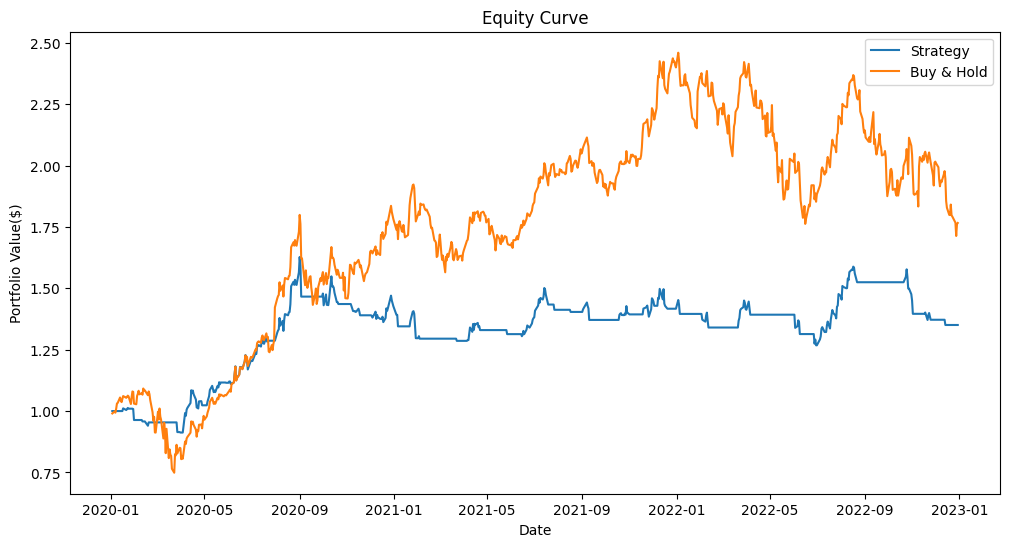

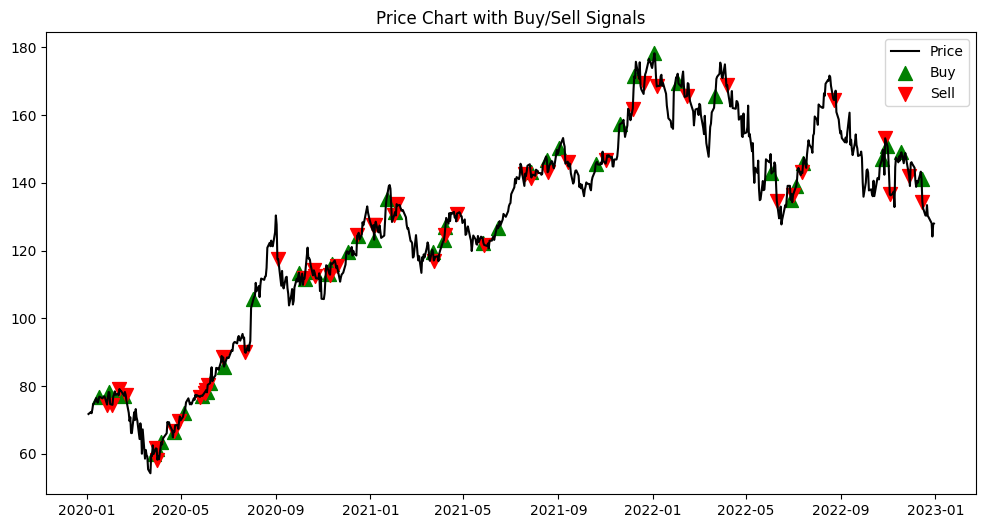

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Run the backtest and report the results
QUIET = True
%run loading-price-data.ipynb
%run backtesting-framework.ipynb
%run ROC-threshold-strategy.ipynb

# Load ROC strategy
signal_roc = roc_threshold_momentum_strategy(data, roc_n=10)
results_roc = backtest_framework(data, signal_roc)

# Adding all reporting/metrics calculations

# Calculate Cumulative Returns
results_roc['Strategy_Cumulative'] = (1 + results_roc['Strategy_Returns']).cumprod()
results_roc['BuyHold_Cumulative'] = (1 + results_roc['Buy_and_Hold_Returns']).cumprod()

# Track trades
results_roc['Position_Change'] = results_roc['Position'].diff()
results_roc['Buy_Signal'] = (results_roc['Position_Change'] == 1).astype(int)
results_roc['Sell_Signal'] = (results_roc['Position_Change'] == -1).astype(int)

# Calculate metrics
strategy_total_return = (results_roc['Strategy_Cumulative'].iloc[-1] - 1) * 100
buyhold_total_return = (results_roc['BuyHold_Cumulative'].iloc[-1] - 1) * 100
num_trades = results_roc['Buy_Signal'].sum()

print(f"Total Return: {strategy_total_return:.2f}%")
print(f"Number of Trades: {num_trades}")

# Equity curve
plt.figure(figsize=(12, 6))
plt.plot(results_roc.index, results_roc['Strategy_Cumulative'], label='Strategy')
plt.plot(results_roc.index, results_roc['BuyHold_Cumulative'], label='Buy & Hold')
plt.title('Equity Curve')
plt.xlabel('Date')
plt.ylabel('Portfolio Value($)')
plt.legend()
plt.show()

# Price chart with buy/sell markers
plt.figure(figsize=(12, 6))
plt.plot(results_roc.index, results_roc['Close'], label='Price', color='black')
buy_points = results_roc[results_roc['Buy_Signal'] == 1]
sell_points = results_roc[results_roc['Sell_Signal'] == 0]
plt.scatter(buy_points.index, buy_points['Close'], marker='^', color='green', s=100, label='Buy')
plt.scatter(sell_points.index, sell_points['Close'], marker='v', color='red', s=100, label='Sell')
plt.title('Price Chart with Buy/Sell Signals')
plt.legend()
plt.show()

